In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import pandas_profiling as pdp
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load dataset

In [2]:
# https://sci2s.ugr.es/keel/dataset.php?cod=52
df = pd.read_csv('./datasets/abalone.csv')
df.shape

(4174, 9)

## Preprocessing
### create missing value data

In [3]:
# create NaN data
num_nan = 10
missing_x = np.random.randint(0, df.shape[0], (num_nan, 1))
missing_y = np.random.randint(0, df.shape[1], (num_nan, 1))

for i, j in zip(missing_x, missing_y):
    df.iloc[i, j] = np.nan

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


### Handling Missing Values

In [5]:
# extract NaN data
df[df.isnull().any(axis=1)]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
915,NaN,0.625,0.490,0.175,1.3325,0.5705,0.2710,0.4050,10.0
937,F,0.655,0.460,NaN,1.4940,0.6895,0.3310,0.1825,9.0
1374,M,0.670,0.500,NaN,1.5190,0.6160,0.3880,0.4150,10.0
1758,F,0.660,0.535,NaN,1.4415,0.5925,0.2775,0.4900,10.0
2516,F,NaN,0.475,0.155,1.0005,0.4520,0.2520,0.2650,10.0
3101,NaN,0.465,0.370,0.100,0.5055,0.2340,0.1100,0.1400,7.0
3528,M,NaN,0.230,0.085,0.1250,0.0420,0.0285,0.0430,8.0
3751,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,NaN
3787,I,NaN,0.205,0.070,0.1055,0.0390,0.0410,0.0350,5.0
4091,F,0.630,0.475,0.150,1.1720,0.5360,0.2540,0.3160,NaN


In [6]:
# Delete or replace missing value
df.dropna(inplace=True) # delete
# df.fillna(df.mean()) # fill NaN
df.shape

(4164, 9)

### Encoding categorical values

In [7]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [8]:
# One-Hot encoding
X = pd.get_dummies(X)

In [9]:
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


## EDA

In [10]:
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
count,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000
mean,0.523983,0.407897,0.139518,0.828472,0.359243,0.180525,0.238818,0.312920,0.321566,0.365514
std,0.119963,0.099163,0.041816,0.489962,0.221748,0.109551,0.139119,0.463738,0.467133,0.481632
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441875,0.186375,0.093500,0.130000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.170500,0.233750,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.151500,0.501500,0.252500,0.328625,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000,1.000000


In [11]:
print(X.shape)
print(Counter(y))

(4164, 10)
Counter({9.0: 688, 10.0: 629, 8.0: 566, 11.0: 486, 7.0: 389, 12.0: 266, 6.0: 259, 13.0: 203, 14.0: 126, 5.0: 114, 15.0: 103, 16.0: 67, 17.0: 58, 4.0: 57, 18.0: 42, 19.0: 32, 20.0: 26, 3.0: 15, 21.0: 14, 23.0: 9, 22.0: 6, 27.0: 2, 24.0: 2, 1.0: 1, 26.0: 1, 29.0: 1, 2.0: 1, 25.0: 1})


In [12]:
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.target import ClassBalance

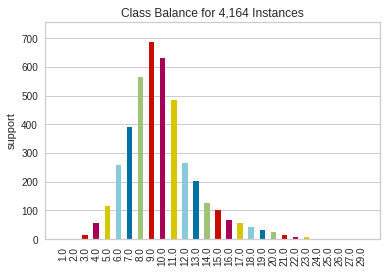

In [19]:
visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

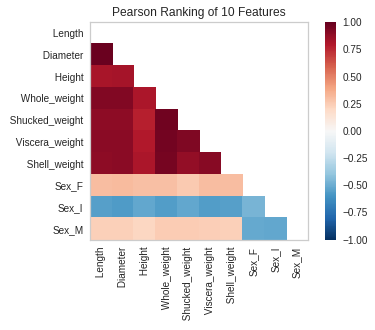

In [18]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=X.columns, algorithm='pearson')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

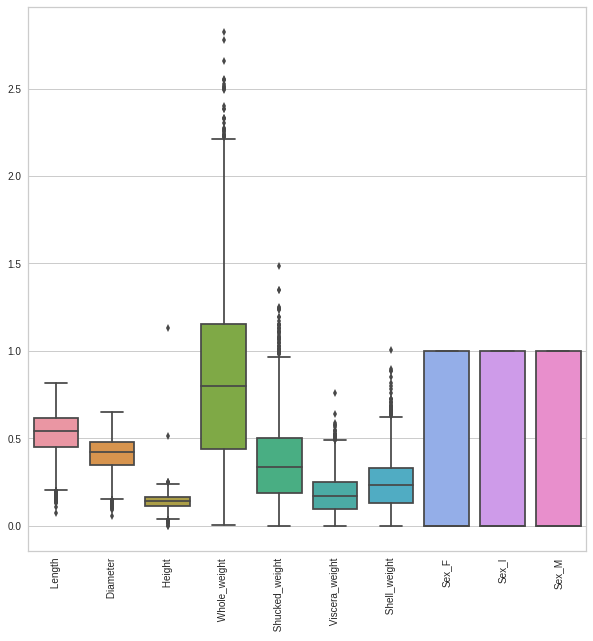

In [15]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)

In [21]:
profile = pdp.ProfileReport(df)
#rejected_variables = profile.get_rejected_variables(threshold=0.9)
profile.to_file(outputfile="output.html")
#profile

## Learning